In [1]:
import pandas as pd

# Load datasets
crop_df = pd.read_csv("crop_production_cleaned.csv")
rain_df = pd.read_csv("rainfall_data_cleaned.csv")

# Display clean previews
print("CROP DATASET OVERVIEW\n")
display(crop_df.head())  

print("\nRAINFALL DATASET OVERVIEW\n")
display(rain_df.head())

CROP DATASET OVERVIEW



,state,district,year,season,crop,area,production,Unnamed: 7
0,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0,NaN
1,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Other Kharifpulses,2.0,1.0,NaN
2,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0,NaN
3,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0,NaN
4,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0,NaN



RAINFALL DATASET OVERVIEW



,subdivision,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual,jjas
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,1696.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,2185.9
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,1874.0
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,1977.6
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1624.9


In [2]:
# --- CROP DATASET OVERVIEW ---
print("CROP DATASET INFO:")
crop_df.info()
print("\nBasic Stats:")
print(crop_df.describe(include='all').transpose())

print("\nMissing Values:")
print(crop_df.isnull().sum())

print("\nUnique entries per column:")
crop_df.nunique()

CROP DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       1000 non-null   object 
 1   district    1000 non-null   object 
 2   year        1000 non-null   int64  
 3   season      1000 non-null   object 
 4   crop        1000 non-null   object 
 5   area        1000 non-null   float64
 6   production  1000 non-null   float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB

Basic Stats:
             count unique             top freq          mean             std  \
state         1000      2  Andhra Pradesh  797           NaN             NaN   
district      1000      5        A0Ntapur  788           NaN             NaN   
year        1000.0    NaN             NaN  NaN       2005.98        5.023429   
season        1000      4          Kharif  394           NaN         

state           2
district        5
year           18
season          4
crop           63
area          779
production    811
Unnamed: 7      0
dtype: int64

In [3]:
# --- RAINFALL DATASET OVERVIEW ---
print("\n\nRAINFALL DATASET INFO:")
print(rain_df.info())
print("\nBasic Stats:")
print(rain_df.describe(include='all').transpose())

print("\nMissing Values:")
print(rain_df.isnull().sum())

print("\nUnique entries per column:")
print(rain_df.nunique())



RAINFALL DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subdivision  1000 non-null   object 
 1   year         1000 non-null   int64  
 2   jan          1000 non-null   float64
 3   feb          1000 non-null   float64
 4   mar          1000 non-null   float64
 5   apr          1000 non-null   float64
 6   may          1000 non-null   float64
 7   jun          1000 non-null   float64
 8   jul          1000 non-null   float64
 9   aug          1000 non-null   float64
 10  sep          1000 non-null   float64
 11  oct          1000 non-null   float64
 12  nov          1000 non-null   float64
 13  dec          1000 non-null   float64
 14  annual       1000 non-null   float64
 15  jjas         1000 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 125.1+ KB
None

Basic Stats:
              count unique   

In [4]:
# --- Final Cleaning Before Merge ---

# Drop unnecessary column
crop_df.drop(columns=["Unnamed: 7"], inplace=True)

# Rename rainfall subdivision column
rain_df.rename(columns={"subdivision": "state"}, inplace=True)

# Filter rainfall dataset to match crop years (1997–2014)
rain_df = rain_df[(rain_df["year"] >= 1997) & (rain_df["year"] <= 2014)]

# Verify ranges
print("Crop Years:", crop_df['year'].min(), "-", crop_df['year'].max())
print("Rainfall Years:", rain_df['year'].min(), "-", rain_df['year'].max())

Crop Years: 1997 - 2014
Rainfall Years: 1997 - 2014


In [5]:
# --- Merge Datasets on State and Year ---
merged_df = pd.merge(crop_df, rain_df, on=["state", "year"], how="left")

# Check merged data
print("Merged Data Shape:", merged_df.shape)
display(merged_df.head())

# Check for any rows where rainfall info is missing (sanity check)
missing_rain = merged_df[merged_df['annual'].isnull()]
print(f"\nMissing rainfall rows: {missing_rain.shape[0]}")

Merged Data Shape: (1000, 21)


,state,district,year,season,crop,area,production,jan,feb,mar,...,may,jun,jul,aug,sep,oct,nov,dec,annual,jjas
0,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Other Kharifpulses,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing rainfall rows: 1000


In [6]:
# Standardize names
rain_df['state'].replace({
    "Andaman & Nicobar Islands": "Andaman and Nicobar Islands"
}, inplace=True)

In [7]:
print("Unique states in crop dataset:")
print(crop_df['state'].unique())

print("\nUnique states in rainfall dataset:")
print(rain_df['state'].unique())

Unique states in crop dataset:
['Andaman and Nicobar Islands' 'Andhra Pradesh']

Unique states in rainfall dataset:
['Andaman and Nicobar Islands' 'Arunachal Pradesh' 'Assam & Meghalaya'
 'Naga Mani Mizo Tripura' 'Sub Himalayan West Bengal & Sikkim'
 'Gangetic West Bengal' 'Orissa' 'Jharkhand']


In [8]:
common_states = list(set(crop_df['state']).intersection(set(rain_df['state'])))
crop_df = crop_df[crop_df['state'].isin(common_states)]
rain_df = rain_df[rain_df['state'].isin(common_states)]

merged_df = pd.merge(crop_df, rain_df, on=['state', 'year'], how='left')
print("Merged Data Shape:", merged_df.shape)
print("Missing rainfall rows:", merged_df['annual'].isna().sum())

Merged Data Shape: (203, 21)
Missing rainfall rows: 0


In [9]:
# --- BASIC EXPLORATION ---
print("Shape of merged dataset:", merged_df.shape)
print("\nColumn names:", merged_df.columns.tolist())

print("\nData types:")
print(merged_df.dtypes)

print("\nMissing values count:")
print(merged_df.isnull().sum())

print("\nMERGED DATASET OVERVIEW\n")
display(merged_df.head())

Shape of merged dataset: (203, 21)

Column names: ['state', 'district', 'year', 'season', 'crop', 'area', 'production', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'annual', 'jjas']

Data types:
state          object
district       object
year            int64
season         object
crop           object
area          float64
production    float64
jan           float64
feb           float64
mar           float64
apr           float64
may           float64
jun           float64
jul           float64
aug           float64
sep           float64
oct           float64
nov           float64
dec           float64
annual        float64
jjas          float64
dtype: object

Missing values count:
state         0
district      0
year          0
season        0
crop          0
area          0
production    0
jan           0
feb           0
mar           0
apr           0
may           0
jun           0
jul           0
aug           0
sep           0
oct       

,state,district,year,season,crop,area,production,jan,feb,mar,...,may,jun,jul,aug,sep,oct,nov,dec,annual,jjas
0,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0,53.0,59.0,171.3,...,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,1244.2
1,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Other Kharifpulses,2.0,1.0,53.0,59.0,171.3,...,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,1244.2
2,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0,53.0,59.0,171.3,...,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,1244.2
3,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0,53.0,59.0,171.3,...,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,1244.2
4,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0,53.0,59.0,171.3,...,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,1244.2


In [10]:
# --- SUMMARY STATISTICS ---
print("\nDescriptive statistics for numeric columns:")
print(merged_df.describe())


Descriptive statistics for numeric columns:
              year          area    production         jan         feb  \
count   203.000000    203.000000  2.030000e+02  203.000000  203.000000   
mean   2005.044335   1664.512660  3.538046e+06   51.258128   16.074877   
std       3.417052   3784.622998  1.305582e+07   37.597299   17.405872   
min    2000.000000      0.200000  0.000000e+00    0.000000    0.000000   
25%    2002.000000     46.650000  3.510500e+01   16.300000    7.900000   
50%    2005.000000    145.260000  3.765000e+02   53.000000    8.000000   
75%    2008.000000    950.785000  2.320000e+03   95.350000   15.700000   
max    2010.000000  18394.700000  7.130000e+07  101.700000   59.000000   

              mar         apr         may         jun         jul         aug  \
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean    58.661084   78.285714  378.963547  380.612808  365.458128  403.118227   
std     62.701522   72.248551  113.434253   8

In [11]:
# --- UNIQUE VALUES ---
print("\nUnique States:", merged_df['state'].unique())
print("\nUnique Seasons:", merged_df['season'].unique())
print("\nUnique Crops (sample 10):", merged_df['crop'].unique()[:10])


Unique States: ['Andaman and Nicobar Islands']

Unique Seasons: ['Kharif' 'Whole Year' 'Autumn' 'Rabi']

Unique Crops (sample 10): ['Arecanut' 'Other Kharifpulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut'
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca']


In [12]:
# --- CORRELATION ANALYSIS ---
numeric_cols = ['area', 'production', 'annual', 'jjas', 'jun', 'jul', 'aug', 'sep']
print("\nCorrelation between crop yield and rainfall metrics:")
print(merged_df[numeric_cols].corr())


Correlation between crop yield and rainfall metrics:
                area  production    annual      jjas       jun       jul  \
area        1.000000    0.858711 -0.060200 -0.079727 -0.086405 -0.029621   
production  0.858711    1.000000 -0.034244 -0.045162 -0.053727 -0.018017   
annual     -0.060200   -0.034244  1.000000  0.814752  0.637093  0.548121   
jjas       -0.079727   -0.045162  0.814752  1.000000  0.556536  0.833433   
jun        -0.086405   -0.053727  0.637093  0.556536  1.000000  0.146662   
jul        -0.029621   -0.018017  0.548121  0.833433  0.146662  1.000000   
aug        -0.026372   -0.016019  0.794507  0.645247  0.242402  0.604723   
sep        -0.016619   -0.003394 -0.510481 -0.301100 -0.157827 -0.458155   

                 aug       sep  
area       -0.026372 -0.016619  
production -0.016019 -0.003394  
annual      0.794507 -0.510481  
jjas        0.645247 -0.301100  
jun         0.242402 -0.157827  
jul         0.604723 -0.458155  
aug         1.000000 -0.818517

In [13]:
# --- YIELD CALCULATION ---
merged_df['yield'] = merged_df['production'] / merged_df['area']
print("\nAverage yield by year:")
print(merged_df.groupby('year')['yield'].mean())


Average yield by year:
year
2000    337.641462
2001    449.482991
2002    398.341453
2003    397.053426
2004    407.792849
2005    361.771764
2006    342.552089
2010    228.231015
Name: yield, dtype: float64


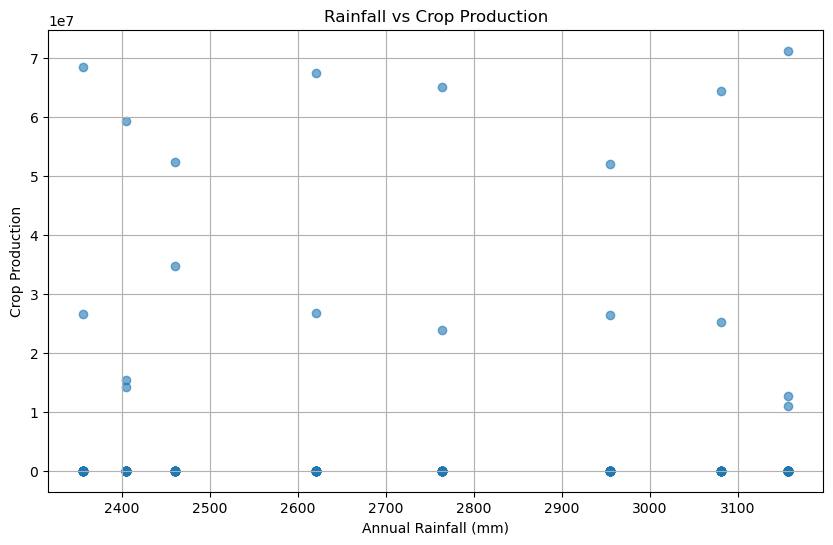

In [14]:
# --- SIMPLE VISUAL CHECK ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(merged_df['annual'], merged_df['production'], alpha=0.6)
plt.title('Rainfall vs Crop Production')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Crop Production')
plt.grid(True)
plt.show()

In [15]:
# Save the merged dataset to a CSV file
merged_df.to_csv("merged_crop_rainfall_data.csv", index=False)

print("✅ Merged dataset successfully saved as 'merged_crop_rainfall_data.csv'")

✅ Merged dataset successfully saved as 'merged_crop_rainfall_data.csv'


In [16]:
import pandas as pd

# Load your merged dataset
merged_df = pd.read_csv("merged_crop_rainfall_data.csv")

# Quick check
print("Shape:", merged_df.shape)
print("Columns:", merged_df.columns)
merged_df.head()

Shape: (203, 22)
Columns: Index(['state', 'district', 'year', 'season', 'crop', 'area', 'production',
       'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
       'nov', 'dec', 'annual', 'jjas', 'yield'],
      dtype='object')


,state,district,year,season,crop,area,production,jan,feb,mar,...,jun,jul,aug,sep,oct,nov,dec,annual,jjas,yield
0,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Arecanut,1254.0,2000.0,53.0,59.0,171.3,...,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,1244.2,1.594896
1,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Other Kharifpulses,2.0,1.0,53.0,59.0,171.3,...,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,1244.2,0.500000
2,Andaman and Nicobar Islands,Nicobars,2000,Kharif,Rice,102.0,321.0,53.0,59.0,171.3,...,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,1244.2,3.147059
3,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Banana,176.0,641.0,53.0,59.0,171.3,...,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,1244.2,3.642045
4,Andaman and Nicobar Islands,Nicobars,2000,Whole Year,Cashewnut,720.0,165.0,53.0,59.0,171.3,...,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,1244.2,0.229167


In [17]:
# Standardize text columns for easy querying
merged_df['state'] = merged_df['state'].str.title()
merged_df['district'] = merged_df['district'].str.title()
merged_df['crop'] = merged_df['crop'].str.title()
merged_df['season'] = merged_df['season'].str.title()

In [18]:
# Top yielding crops
def top_yielding_crops(year=None, top_n=5):
    df = merged_df.copy()
    if year:
        df = df[df['year'] == year]
    result = df.groupby('crop')['yield'].mean().sort_values(ascending=False).head(top_n)
    return result

# Highest rainfall year
def highest_rainfall_year():
    return merged_df.groupby('year')['annual'].mean().idxmax()

# District with max production
def top_production_district(year=None):
    df = merged_df.copy()
    if year:
        df = df[df['year'] == year]
    return df.groupby('district')['production'].sum().sort_values(ascending=False).head(1)

In [19]:
def answer_query(query):
    query = query.lower()

    # Normalize synonyms
    if "top" in query or "best" in query or "maximum" in query:
        query = query.replace("top", "highest").replace("best", "highest").replace("maximum", "highest")

    if "highest yield" in query or ("yield" in query and "highest" in query):
        year = next((int(word) for word in query.split() if word.isdigit()), None)
        result = top_yielding_crops(year)
        return f"Top yielding crops in {year if year else 'overall'}:\n{result}"

    elif "rainfall" in query and "highest" in query:
        year = highest_rainfall_year()
        return f"The year with the highest average rainfall is {year}."

    elif "district" in query and ("production" in query or "output" in query):
        year = next((int(word) for word in query.split() if word.isdigit()), None)
        result = top_production_district(year)
        return f"Top district by production in {year if year else 'overall'}:\n{result}"

    else:
        return "Sorry, I couldn’t understand that query. Try asking about yield, rainfall, or production."

def top_yielding_crops(year=None):
    df = merged_df.copy()

    # Normalize column names
    df.columns = df.columns.str.lower()

    # Convert year column to numeric (just in case)
    df['year'] = pd.to_numeric(df['year'], errors='coerce')

    # Apply filter if year is provided
    if year:
        df = df[df['year'] == year]

    if df.empty:
        return f"No yield data available for {year}. Try another year between {merged_df['year'].min()}–{merged_df['year'].max()}."


    # Group by crop and get mean yield
    result = df.groupby('crop')['yield'].mean().sort_values(ascending=False).head(5)
    return result

# Example test
print(answer_query("Which year had the highest rainfall?"))
print(answer_query("Show top yielding crops in 2005"))

The year with the highest average rainfall is 2010.
Top yielding crops in 2005:
crop
Coconut       3749.091268
Sugarcane       19.123574
Banana          16.320926
Dry Ginger       9.000000
Turmeric         7.000612
Name: yield, dtype: float64


## Q&A Chat Interface using Gradio

In [20]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [21]:
!pip install --upgrade gradio==4.44.0
!pip install --upgrade huggingface_hub==0.23.0

In [22]:
import gradio as gr

def qa_chat(query):
    response = answer_query(query)
    return response

iface = gr.Interface(
    fn=qa_chat,
    inputs=gr.Textbox(lines=2, placeholder="Ask a question like 'Top yielding crop in 2005'..."),
    outputs="text",
    title="Crop & Rainfall Insights Chat System",
    description="Ask questions about rainfall, production, or yield. Data is based on merged crop-rainfall dataset."
)

iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


/Users/sakshi/opt/anaconda3/lib/python3.9/site-packages/gradio/analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.44.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(
